In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
%matplotlib inline

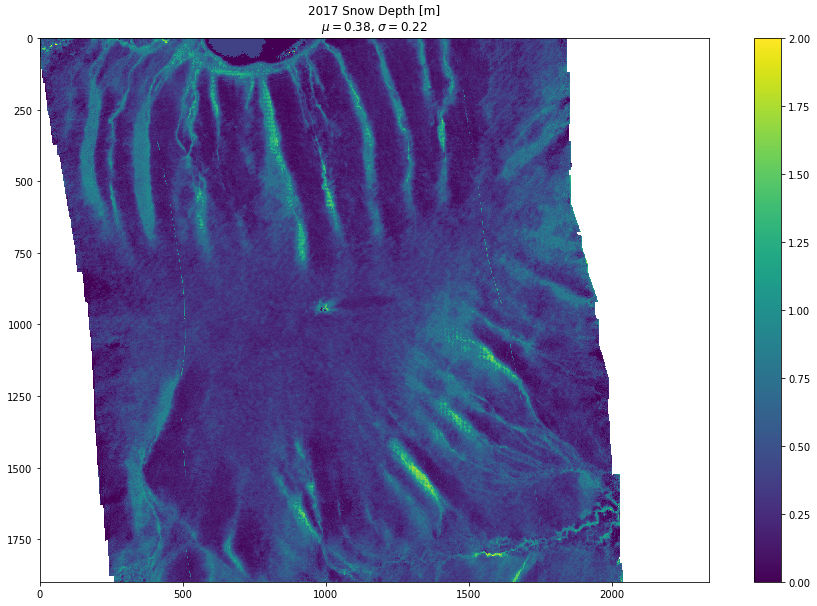

In [30]:
src = rasterio.open('/home/cparr/surfaces/depth_ddems/hv_version2/hv_depth_apr12_2017.tif')
depth = src.read(1)[4100:6000]

mu = np.nanmean(depth)
sigma = np.nanstd(depth)
dmin = np.nanmin(depth)
dmax = np.nanmax(depth)

fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(111)
im = plt.imshow(depth, vmin = 0, vmax = 2)
ax.set_title("2017 Snow Depth [m]" +'\n'+
             "$\mu=%.2f$, $\sigma=%.2f$"  %(mu,sigma))
fig.colorbar(im)

/home/cparr/miniconda3/envs/raster_IO/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


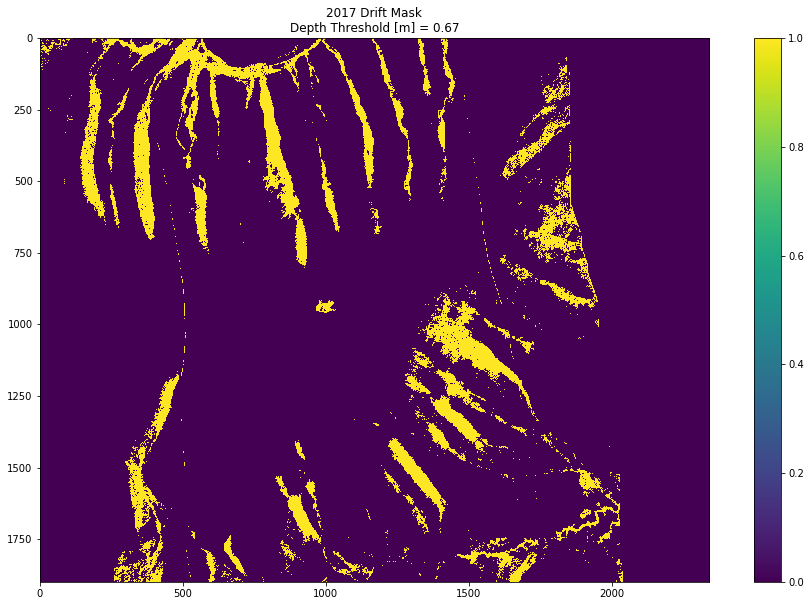

In [45]:
# Establish A Depth Threshold for Drifts

threshold = mu + 0.75*mu
drift_mask = depth > threshold

fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(111)
im = plt.imshow(drift_mask)
ax.set_title("2017 Drift Mask" +'\n'+
             "Depth Threshold [m] = %.2f"  %threshold)
fig.colorbar(im)

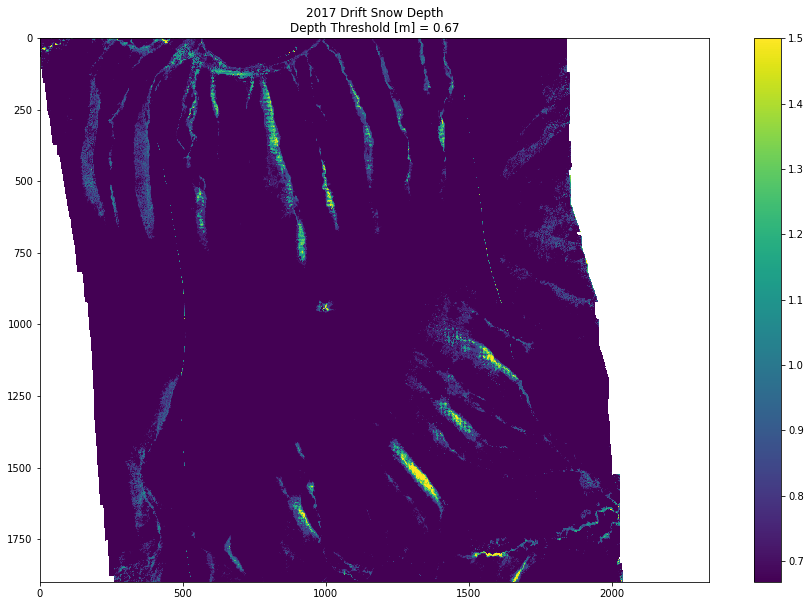

In [46]:
drift_snow = drift_mask * depth

fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(111)
im = plt.imshow(drift_snow, vmin = threshold, vmax = 1.5)
ax.set_title("2017 Drift Snow Depth" +'\n'+
             "Depth Threshold [m] = %.2f"  % threshold)
fig.colorbar(im)

/home/cparr/miniconda3/envs/raster_IO/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


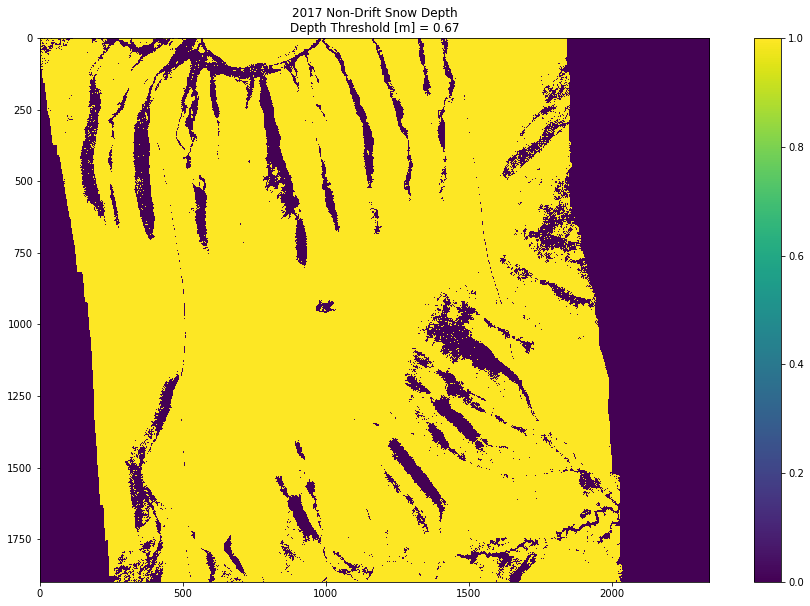

In [47]:
non_drift_mask = depth <= threshold
non_drift_snow = non_drift_mask * depth

fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(111)
im = plt.imshow(non_drift_mask)#, vmin = 0, vmax = threshold)
ax.set_title("2017 Non-Drift Snow Depth" +'\n'+
             "Depth Threshold [m] = %.2f"  % threshold)
fig.colorbar(im)

In [48]:
# Calculate Drift Snow

# Calculate Drift Area (pixels are 1 m x 1 m)

drift_area = np.nansum(drift_mask)
print ("Drift Area = %.2f m^2" % drift_area)

# Sum the snow depths

drift_depth_sum = np.nansum(drift_snow)
print ("Sum of All Depths = %.2f m" % drift_depth_sum)

# Calculate Drift Snow Volume
drift_volume = drift_area * drift_depth_sum
print ("Drift Volume = %.2f m^3" % drift_volume)

# Calculate Mass of Snow for a certain density value (kg/m^3)
ro = 400
drift_mass = ro * drift_volume
print ("Drift Mass = %.2f kg" % drift_mass)

Drift Area = 371578.00 m^2
Sum of All Depths = 308596.38 m
Drift Volume = 114667623829.75 m^3
Drift Mass = 45867049531900.00 kg


In [49]:

# Calculate Non-Drift Snow

# Calculate Non-Drift Area (pixels are 1 m x 1 m)

non_drift_area = np.nansum(non_drift_mask)
print ("Non-Drift Area = %.2f m^2" % non_drift_area)

# Sum the snow depths

non_drift_depth_sum = np.nansum(non_drift_snow)
print ("Sum of All Depths = %.2f m" % non_drift_depth_sum)

# Calculate Drift Snow Volume
non_drift_volume = non_drift_area * non_drift_depth_sum
print ("Non-Drift Volume = %.2f m^3" % non_drift_volume)

# Calculate Mass of Snow for a certain density value (kg/m^3)
ro = 200
non_drift_mass = ro * non_drift_volume
print ("Non-Drift Mass = %.2f kg" % non_drift_mass)


Non-Drift Area = 3040030.00 m^2
Sum of All Depths = 994316.12 m
Non-Drift Volume = 3022750849483.75 m^3
Non-Drift Mass = 604550169896750.00 kg


In [50]:
area_drift_to_non_drift_ratio = (drift_area / non_drift_area) * 100
print("Ratio of Drift Area to Non-Drift Area = %.1f%%" % area_drift_to_non_drift_ratio)

Ratio of Drift Area to Non-Drift Area = 12.2%


In [51]:
mass_drift_to_non_drift_ratio = (drift_mass / non_drift_mass) * 100
print("Ratio of Drift Mass to Non-Drift Mass = %.1f%%" % mass_drift_to_non_drift_ratio)

Ratio of Drift Mass to Non-Drift Mass = 7.6%
